In [1]:
import numpy as np

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
import umap.umap_ as umap

reducer = umap.UMAP()


/home/mmp/.local/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/mmp/.local/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/mmp/.local/lib/python3.10/site-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopyth

In [11]:
template_metrics = pd.read_excel('./template_metrics.xlsx')

In [12]:
template_metrics.head()

,peak_to_valley,peak_trough_ratio,half_width,repolarization_slope,recovery_slope
0,0.000330,-0.194860,0.000150,6.794009e+05,-33941.366584
1,0.000340,-0.176187,0.000140,3.358339e+05,-9348.547159
2,0.000305,-0.243930,0.000165,1.445264e+06,-73257.240755
3,0.000270,-0.186892,0.000140,1.085475e+06,-24698.210476
4,0.000575,-0.229663,0.000270,2.161884e+05,-27180.383370


In [13]:
scaler = StandardScaler()

In [14]:
numerical_columns = template_metrics.select_dtypes(include=['int', 'float']).columns

# Fit and transform the selected numerical columns using StandardScaler
template_metrics[numerical_columns] = scaler.fit_transform(template_metrics[numerical_columns])

print("\nDataFrame after StandardScaler:")
print(template_metrics)


DataFrame after StandardScaler:
     peak_to_valley  peak_trough_ratio  half_width  repolarization_slope   
0         -0.209332           0.371961   -0.155772             -0.530199  \
1         -0.150191           0.541849   -0.220990             -1.006233   
2         -0.357183          -0.074471   -0.057945              0.530952   
3         -0.564175           0.444459   -0.220990              0.032442   
4          1.239611           0.055332    0.626842             -1.172009   
..              ...                ...         ...                   ...   
134       -0.445894           0.121135   -0.253599              0.950296   
135       -1.126010          -1.321551   -0.286208              0.602221   
136       -1.273861          -1.149402   -0.384034              1.262898   
137       -0.593745          -1.809574   -0.123163              1.404100   
138       -0.682456          -1.286772    0.007272             -0.364305   

     recovery_slope  
0          0.347355  
1         

In [15]:
embedding = reducer.fit_transform(template_metrics)
embedding.shape

(139, 2)

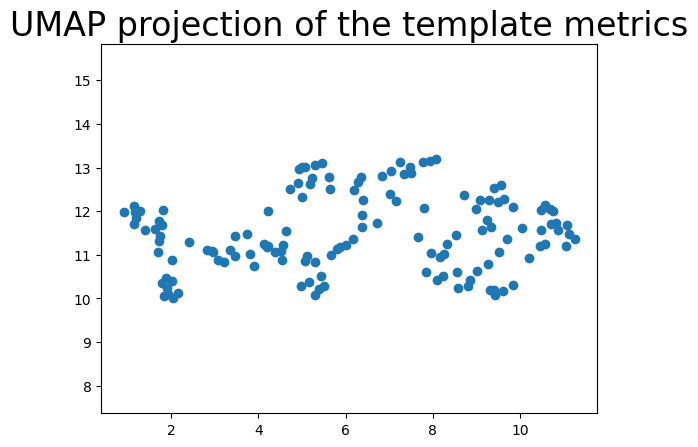

In [16]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1]
    #c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})]
    )
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the template metrics', fontsize=24);

In [9]:
metrics = pd.read_excel('./metrics.xlsx')
metrics.describe()

/home/mmp/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,num_spikes,firing_rate,presence_ratio,snr,isi_violations_ratio,isi_violations_count,rp_contamination,rp_violations,sliding_rp_violation,amplitude_cutoff,amplitude_median
count,139.000000,139.000000,139.0,139.0,139.000000,139.000000,139.000000,139.000000,90.000000,139.000000,139.000000
mean,1087.604317,3.625348,1.0,inf,0.074154,0.669065,0.040198,0.208633,0.156500,0.008327,162.337324
std,762.312031,2.541040,0.0,NaN,0.152241,1.746170,0.164469,0.912671,0.102917,0.014245,100.831864
min,509.000000,1.696667,1.0,inf,0.000000,0.000000,0.000000,0.000000,0.010000,0.000221,6.294251
25%,648.500000,2.161667,1.0,NaN,0.000000,0.000000,0.000000,0.000000,0.061250,0.001296,81.825260
50%,845.000000,2.816667,1.0,NaN,0.000000,0.000000,0.000000,0.000000,0.157500,0.002723,151.062010
75%,1179.500000,3.931667,1.0,NaN,0.075983,1.000000,0.000000,0.000000,0.246250,0.007403,214.004520
max,5565.000000,18.550000,1.0,inf,0.846332,14.000000,1.000000,9.000000,0.340000,0.083733,528.717040


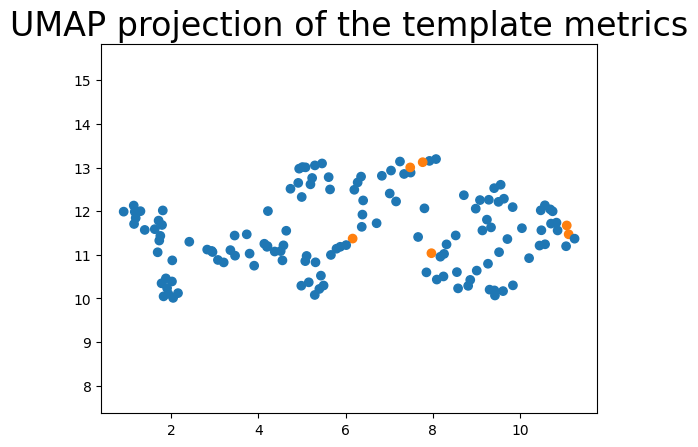

In [17]:
threshold = 10
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[1] if x > threshold else sns.color_palette()[0] for x in metrics.firing_rate]
    )
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the template metrics', fontsize=24);

In [3]:
template_metrics = pd.read_excel('new_temp_metrics.xlsx')

In [4]:
template_metrics.head()

,Unnamed: 0,Unit,Amp,TTP,REP


In [5]:
template_metrics2 = template_metrics[['Amp','TTP','REP']].copy()

In [6]:
template_metrics2.head()


,Amp,TTP,REP
0,-143.433548,6,5
1,-41.806450,7,4
2,-242.656128,7,5
3,-109.583015,6,4
4,-85.853729,12,6


In [7]:
scaler = StandardScaler()
numerical_columns = template_metrics2.select_dtypes(include=['int', 'float']).columns

# Fit and transform the selected numerical columns using StandardScaler
template_metrics2[numerical_columns] = scaler.fit_transform(template_metrics2[numerical_columns])

print("\nDataFrame after StandardScaler:")
print(template_metrics2)


DataFrame after StandardScaler:
          Amp       TTP       REP
0    0.156845  0.101991  0.002914
1    1.208039  0.316790 -0.402191
2   -0.869477  0.316790  0.002914
3    0.506983  0.101991 -0.402191
4    0.752430  1.390785  0.408019
..        ...       ...       ...
134 -0.415042  0.101991 -0.807295
135  0.329115 -0.542406 -0.402191
136 -0.017118 -0.542406 -0.807295
137 -0.940704  0.101991 -0.807295
138  0.493310 -0.112808 -0.807295

[139 rows x 3 columns]


(139, 2)


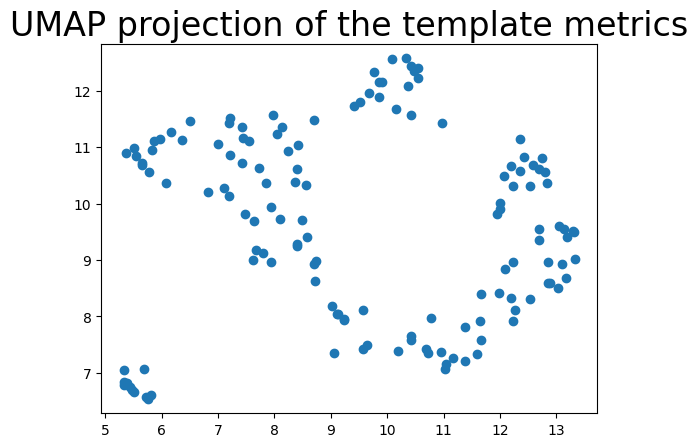

In [8]:
embedding = reducer.fit_transform(template_metrics2)
print(embedding.shape)
plt.scatter(
    embedding[:, 0],
    embedding[:, 1]
    #c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})]
    )
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the template metrics', fontsize=24);

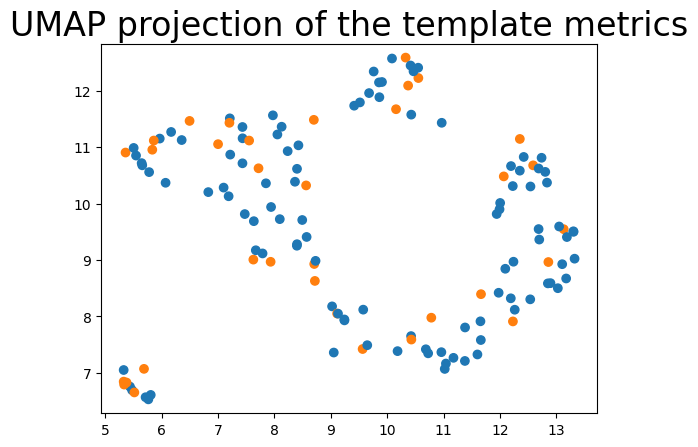

In [10]:
threshold = 4
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[1] if x > threshold else sns.color_palette()[0] for x in metrics.firing_rate]
    )
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the template metrics', fontsize=24);